In [10]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [11]:
df = pd.read_csv(os.path.join("..", "Resources", "movies_complete.csv"))
df.head()

,imdb_title_id,original_title,year,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0021749,City Lights,1931,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,"Virginia Cherrill, Florence Lee, Harry Myers, ...","With the aid of a wealthy erratic tippler, a d...",8.5,162668,1500000,"19,181",46008,99,295.0,122
1,tt0027977,Modern Times,1936,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,"Charles Chaplin, Paulette Goddard, Henry Bergm...",The Tramp struggles to live in modern industri...,8.5,211250,1500000,"163,577",457688,96,307.0,115
2,tt0029453,Pépé le Moko,1937,"Crime, Drama, Romance",94,France,"French, Arabic",Julien Duvivier,"Henri La Barthe, Henri La Barthe",Paris Film,"Jean Gabin, Gabriel Gabrio, Saturnin Fabre, Fe...",A wanted gangster is both king and prisoner of...,7.7,6180,60000,"155,895",155895,98,46.0,55
3,tt0029583,Snow White and the Seven Dwarfs,1937,"Animation, Family, Fantasy",83,USA,English,"William Cottrell, David Hand","Jacob Grimm, Wilhelm Grimm",Walt Disney Productions,"Roy Atwell, Stuart Buchanan, Adriana Caselotti...",Exiled into the dangerous forest by her wicked...,7.6,177157,1499000,"184,925,486",184925486,95,260.0,173
4,tt0031381,Gone with the Wind,1939,"Drama, History, Romance",238,USA,English,"Victor Fleming, George Cukor","Margaret Mitchell, Sidney Howard",Selznick International Pictures,"Thomas Mitchell, Barbara O'Neil, Vivien Leigh,...",A manipulative woman and a roguish man conduct...,8.1,283975,3977000,"200,852,579",402352579,97,881.0,197


In [12]:
X = df[["year", "genre", "country", "language", "budget"]]
y = df["usa_gross_income"].values.reshape(-1, 1)
print(X.shape, y.shape)

(6083, 5) (6083, 1)


In [ ]:
# One hot encoding for the categorical variables to convert to numeric values 
#from sklearn.preprocessing import OneHotEncoder


In [13]:
# Dummy encoding
X = pd.get_dummies(X)
X.head()

,year,budget,genre_Action,"genre_Action, Adventure","genre_Action, Adventure, Biography","genre_Action, Adventure, Comedy","genre_Action, Adventure, Crime","genre_Action, Adventure, Drama","genre_Action, Adventure, Family","genre_Action, Adventure, Fantasy",...,"language_Swedish, English","language_Swedish, German, Yiddish, English, French","language_Swedish, Spanish","language_Swiss German, English",language_Tibetan,"language_Tswana, English","language_Uzbek, English, Dari, Russian, Spanish","language_Vietnamese, English","language_Vietnamese, English, Mandarin, Cantonese, Malay","language_Zulu, Xhosa, Afrikaans, English"
0,1931,1500000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1936,1500000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1937,60000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1937,1499000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1939,3977000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,year,budget,genre_Action,"genre_Action, Adventure","genre_Action, Adventure, Biography","genre_Action, Adventure, Comedy","genre_Action, Adventure, Crime","genre_Action, Adventure, Drama","genre_Action, Adventure, Family","genre_Action, Adventure, Fantasy",...,"language_Swedish, English","language_Swedish, German, Yiddish, English, French","language_Swedish, Spanish","language_Swiss German, English",language_Tibetan,"language_Tswana, English","language_Uzbek, English, Dari, Russian, Spanish","language_Vietnamese, English","language_Vietnamese, English, Mandarin, Cantonese, Malay","language_Zulu, Xhosa, Afrikaans, English"
95,1970,15000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2259,2002,50000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5000,2013,28000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3904,2009,42000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
842,1989,16000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#Fitting the Standard scaler model to the training data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

ValueError: could not convert string to float: '$31,559,552'

In [ ]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [48]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [51]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")


LinearRegression()


In [ ]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

### END SOLUTION

In [ ]:
# Call the `score` method on the model to show the r2 score

### BEGIN SOLUTION
model.score(X_test, y_test)
### END SOLUTION

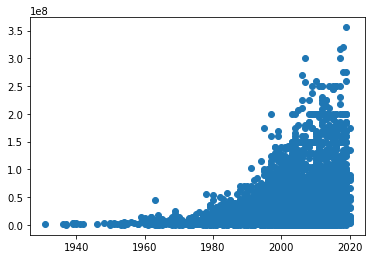

In [50]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [52]:
# Print the coefficient and the intercept for the model

### BEGIN SOLUTION
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
### END SOLUTION

Weight coefficients:  [[852452.71629842]]
y-axis intercept:  [-1.67480902e+09]
